**Análise do Microdados do ENEM**

In [ ]:
## Importando os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk') # Um estilo pronto para criar um gráfico - para escolher outros - plt.style.available
import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-7d9254087bdb>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk') # Um estilo pronto para criar um gráfico - para escolher outros - plt.style.available


In [ ]:
dadosEnem = pd.read_csv('MICRODADOS_ENEM_2022.csv', sep= ';', encoding='ISO-8859-1')


In [ ]:
## Mostrar as 5 primeiras linhas do conjunto de dados
dadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [ ]:
## Mostrar a quatidade de dados em linhas e colunas
dadosEnem.shape

(3476105, 76)

In [ ]:
print('A base de dados apresenta {} linhas e {} colunas'.format(dadosEnem.shape[0], dadosEnem.shape[1])) ## informar a quantidade de dados apresentados nas linhas e colunas

A base de dados apresenta 3476105 linhas e 76 colunas


In [ ]:
dadosEnem.columns.to_list() ## listando todas as colunas

['NU_INSCRICAO',
 'NU_ANO',
 'TP_FAIXA_ETARIA',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'SG_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TP_LINGUA',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009

In [ ]:
dfenem = dadosEnem.copy() ## copiando a base de dados antes de dropar

**Decisões sobre valores nulos**

In [ ]:
dadosEnem.isna().sum() ## contando os valores nulos ou ausentes de cada coluna do DataFrame

NU_INSCRICAO       0
NU_ANO             0
TP_FAIXA_ETARIA    0
TP_SEXO            0
TP_ESTADO_CIVIL    0
                  ..
Q021               0
Q022               0
Q023               0
Q024               0
Q025               0
Length: 76, dtype: int64

In [ ]:
dadosEnem.isna().sum().sum() ## somando o total de valores nulos ou ausentes do DataFrame

43588113

In [ ]:
dadosEnem.isna().sum().values  ## verificar se cada valor em 'dadosEnem' são valores nulos ou ausentes

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0, 2213361,       0, 2524161, 2524161,
       2524161, 2524161, 2524161, 2524161, 2524161,       0,       0,
             0,       0,       0,       0,       0,       0, 1120710,
        982663,  982663, 1120710, 1120710,  982663,  982663, 1120710,
       1120710,  982663,  982663, 1120710,       0, 1120710,  982663,
        982663, 1120710,  982663,  982663,  982663,  982663,  982663,
        982663,  982663,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0])

In [ ]:
dadosEnem.dtypes.value_counts()  ## mostrando os valores e tipos de dados de todo DataFrame

object     37
float64    21
int64      18
dtype: int64

*observando os dados do array [2, 4] dados pelo "dadosEnem.isna().sum().values" que corresponde respectivamente FAIXA_ETARIA, RACA_COR. Podemos concluir que para a nossa analise não serão necessários a limpeza de dados. Já que esses dados nos retorna o valor 0, afirmando que não existe valores nulos ou ausentes em nossa amostra.*

**Selecionando colunas de Número e colunas de Texto**

In [ ]:
dadosEnem.select_dtypes(include='number').head() ## exibindo as tabelas com variaves de número

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
0,210057943671,2022,14,2,2,1,1,2,1,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,210057516120,2022,14,2,1,1,1,16,1,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,210057280536,2022,5,1,2,1,1,2,1,NaN,...,565.3,1,1.0,140.0,200.0,120.0,140.0,160.0,760.0,2
3,210055724397,2022,6,1,3,1,1,2,1,NaN,...,416.0,1,1.0,120.0,40.0,40.0,100.0,20.0,320.0,3
4,210055097896,2022,4,0,3,1,1,1,1,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
dadosEnem.select_dtypes(include='object').head() ## exibindo as tabelas com variaves de object (string)

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,M,NaN,NaN,Brasília,DF,NaN,NaN,NaN,NaN,NaN,...,B,A,A,A,A,A,A,A,A,A
1,M,NaN,NaN,Brasília,DF,NaN,NaN,NaN,NaN,NaN,...,E,E,B,E,B,B,E,B,E,B
2,F,NaN,NaN,Presidente Tancredo Neves,BA,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,...,A,A,A,A,A,A,C,A,A,B
3,M,NaN,NaN,Cariacica,ES,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,...,B,A,A,C,A,A,C,B,B,B
4,M,NaN,NaN,Salinópolis,PA,NaN,NaN,NaN,NaN,NaN,...,A,A,A,A,A,A,B,A,A,A


**Escolhendo as colunas especificas que desejamos trabalhar: 'TP_FAIXA_ETARIA' - para ver a idade dos inscritos,'TP_COR_RACA' - nos mostra a declaração de raça/cor das pessoas inscritas no ENEM, sendo 0 - Não declarado, 1 - Branca, 2 - Preta, 3 - Parda, 4 - Amarela, 5 - Indígina.**

In [ ]:
## criando um Data Frame apenas com as colunas que desejamos analisar
dadosEnem = dadosEnem [['TP_FAIXA_ETARIA','TP_COR_RACA',]]
dadosEnem

,TP_FAIXA_ETARIA,TP_COR_RACA
0,14,2
1,14,1
2,5,2
3,6,3
4,4,3
...,...,...
3476100,3,1
3476101,14,1
3476102,2,1
3476103,3,3


In [ ]:
dadosEnem.shape ## Mostrar a quatidade de dados em linhas e colunas

(3476105, 2)

In [ ]:
print('A base de dados apresenta {} linhas e {} colunas'.format(dadosEnem.shape[0], dadosEnem.shape[1])) ## informar a quantidade de dados apresentados nas linhas e colunas

A base de dados apresenta 3476105 linhas e 2 colunas


In [ ]:
dadosEnem.dtypes.value_counts() ## mostrando os valores e tipos de dados de todo DataFrame

int64    2
dtype: int64

In [ ]:
dadosEnem.describe() ## vai mostrar um resumo estatístico do Dataset que são do tipo numerc

,TP_FAIXA_ETARIA,TP_COR_RACA
count,3.476105e+06,3.476105e+06
mean,4.863503e+00,2.035284e+00
std,3.690560e+00,1.019759e+00
min,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00
50%,3.000000e+00,2.000000e+00
75%,6.000000e+00,3.000000e+00
max,2.000000e+01,5.000000e+00


In [ ]:
##usando o Loc - para localizar os dados
dadosEnem.loc[dadosEnem['TP_FAIXA_ETARIA'] == 3] ## Localizando as pessoas que possivelmente acabaram o ensino médio com idade de 18 anos

,TP_FAIXA_ETARIA,TP_COR_RACA
30,3,3
39,3,1
49,3,2
55,3,1
59,3,3
...,...,...
3476087,3,3
3476091,3,2
3476093,3,1
3476100,3,1


**Analisando Faixa Etária**

In [ ]:
dadosEnem['TP_FAIXA_ETARIA'].unique() ## selecionando a coluna diretamente

array([14,  5,  6,  4,  8,  2,  7,  1, 11,  3, 12, 10,  9, 13, 16, 15, 17,
       18, 20, 19])

In [ ]:
np.sort(dadosEnem.TP_FAIXA_ETARIA.unique()) ## Ordenando os dados da coluna

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
idade = dadosEnem.TP_FAIXA_ETARIA

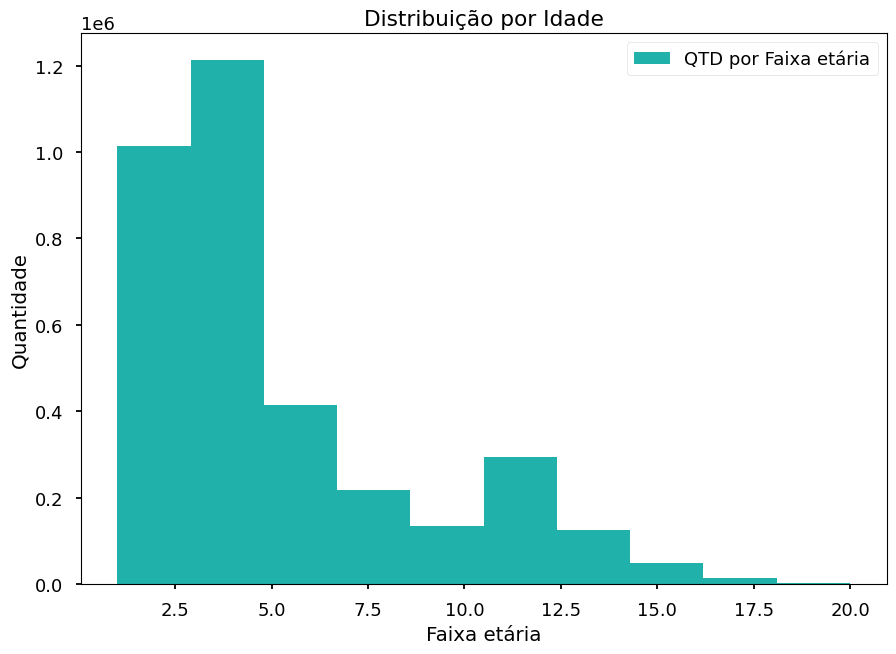

In [ ]:
## Historama - para visualizar a quantidade por valor
plt.hist(idade, label = 'QTD por Faixa etária', color ='lightseagreen') #QTD = 'quantidade'
plt.title('Distribuição por Idade')
plt.xlabel('Faixa etária') #eixo x
plt.ylabel('Quantidade') #eixo y
plt. legend()
#plt.grid(True)
plt.show()

**Analisando Raça/Cor**

In [ ]:
dadosEnem['TP_COR_RACA'].unique()

array([2, 1, 3, 5, 0, 4])

In [ ]:
np.sort(dadosEnem.TP_COR_RACA.unique())

array([0, 1, 2, 3, 4, 5])

In [ ]:
raca = dadosEnem.TP_COR_RACA

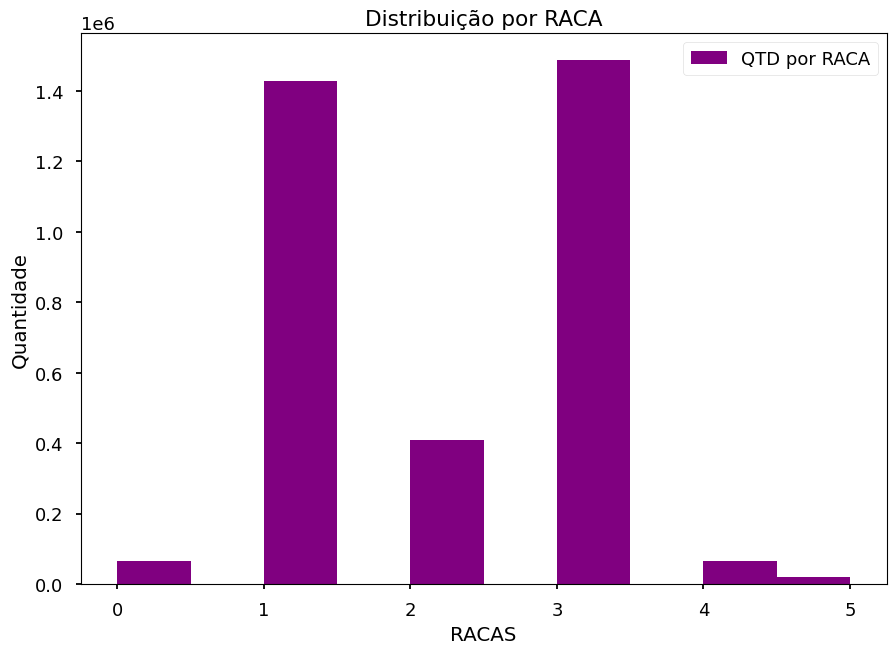

In [ ]:
plt.hist(raca, label = 'QTD por RACA', color ='purple') #QTD = 'quantidade'
plt.title('Distribuição por RACA')
plt.xlabel('RACAS') #eixo x
plt.ylabel('Quantidade') #eixo y
plt. legend()
#plt.grid(True)
plt.show()